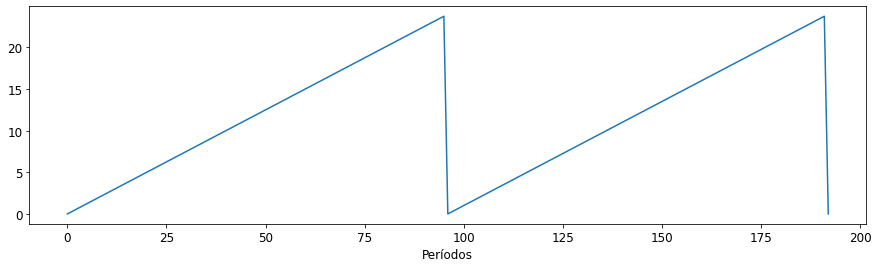

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from graph_traffic.merge_data import merge_data
from graph_traffic.custom_transformer import transform_df, get_column_names
import matplotlib as mpl
from graph_traffic.config import figures_path

figures_path_codif = f"{figures_path}/codificacion"

mpl.rcParams['axes.grid'] = False
mpl.rcParams.update({'font.size': 12})

from_date = "2019-04-04 00:00:00"
to_date = "2019-04-06 00:00:00"

id = 1001

meteo_dict = dict(
    rain="drop",
    wind="drop",
    temperature="drop",
    humidity="drop",
    pressure="drop",
    radiation="drop"
)

temporal_dict = dict(
    year="drop",
    season="drop",
    month="drop",
    day_of_month="drop",
    weekday="drop",
    hour="passthrough",
    minute="drop",
    bank_holiday="drop",
    school_holiday="drop",
    working_day="drop"
)

df = merge_data(id, from_date=from_date, to_date=to_date)
df = transform_df(df, meteo_dict, temporal_dict, "drop", "intensidad")
columns = get_column_names(meteo_dict, temporal_dict, interactions="drop", target="intensidad")

df = pd.DataFrame(df[:, 3:], columns=columns[3:])

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Períodos")
df.loc[:3*4*24].plot(ax=ax, legend=False)
plt.savefig(f"{figures_path_codif}/passthorugh_hora.png")
plt.show()

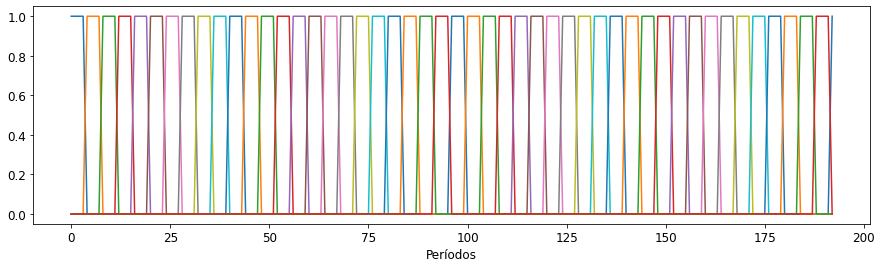

In [19]:
temporal_dict["hour"] = "one_hot"

df = merge_data(id, from_date=from_date, to_date=to_date)
df = transform_df(df, meteo_dict, temporal_dict, "drop", "intensidad")
columns = get_column_names(meteo_dict, temporal_dict, interactions="drop", target="intensidad")

df = pd.DataFrame(df[:, 3:], columns=columns[3:])

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Períodos")
df.loc[:3*4*24].plot(ax=ax, legend=False)
plt.savefig(f"{figures_path_codif}/one_hot_hora.png")
plt.show()

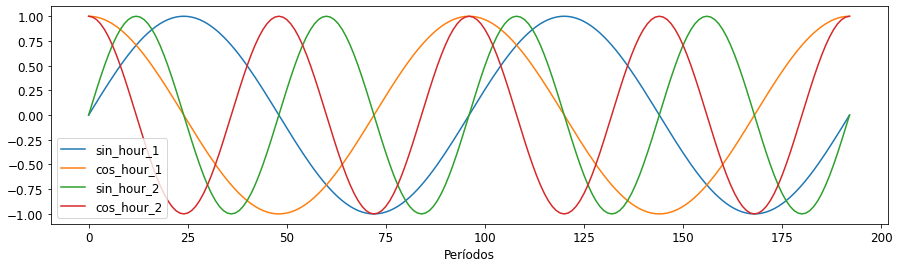

In [20]:
temporal_dict["hour"] = "fourier_2"

df = merge_data(id, from_date=from_date, to_date=to_date)
df = transform_df(df, meteo_dict, temporal_dict, "drop", "intensidad")
columns = get_column_names(meteo_dict, temporal_dict, interactions="drop", target="intensidad")

df = pd.DataFrame(df[:, 3:], columns=columns[3:])

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Períodos")
df.loc[:3*4*24].plot(ax=ax, legend=True)
plt.savefig(f"{figures_path_codif}/fourier_hora.png")
plt.show()

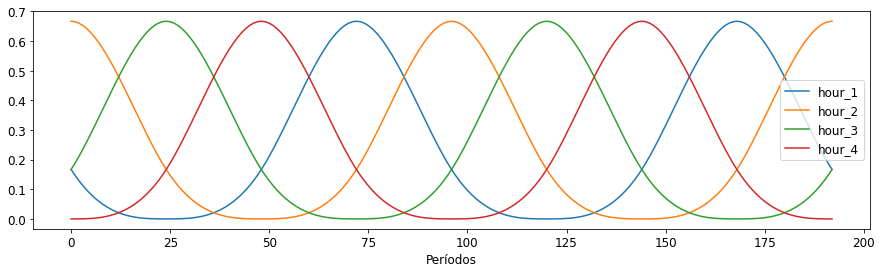

In [21]:
temporal_dict["hour"] = "spline_4"

df = merge_data(id, from_date=from_date, to_date=to_date)
df = transform_df(df, meteo_dict, temporal_dict, "drop", "intensidad")
columns = get_column_names(meteo_dict, temporal_dict, interactions="drop", target="intensidad")

df = pd.DataFrame(df[:, 3:], columns=columns[3:])
#df = pd.DataFrame(df[:, :], columns=columns[:])
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Períodos")
df.loc[:3*4*24].plot(ax=ax)
plt.savefig(f"{figures_path_codif}/spline_hora.png")
plt.show()